# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Import API key
from config import weather_key

# Dependencies
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


import json
import requests

from citipy import citipy

import time

In [ ]:
lat_min=-90
lat_max=90
lng_min=-180
lng_max=180

In [ ]:
# Range of latitudes and longitudes
lat_range = (lat_min, lat_max)
lng_range = (lng_min, lng_max)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_key}&units=Imperial&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [ ]:
# Get list of random coordinate pairs


In [ ]:
result = len(cities)
while result  <=500:
    try:
        # connect
        result = get_data(...)
    except:
         pass

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
Size=1

lats = np.random.uniform(low=-90.000, high=90.000,size=2)
lngs = np.random.uniform(low=-180.000, high=180.000,size=1)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


In [3]:


# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#cities


605

In [ ]:
#cities=random.choices(cities k=10)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
columns = ["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]
City_Weather_df = pd.DataFrame(columns = columns)
City_Weather_df["City"]=cities
City_Weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tigbao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,saldanha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,butaritari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ust-ishim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
600,gat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,zapolyarnyy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,ambodifototra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603,itoman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
record_num = 1
total_No_Records=len(City_Weather_df)
#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print(''' -----------------------------''')
for column, row in City_Weather_df.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + '&APPID=' + weather_key
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Retrieved Record {record_num} of {total_No_Records}  | {response["name"]}')
        
        
        
        #Input data into the dataframe
        City_Weather_df.loc[column, 'Lat'] = response['coord']['lat']
        City_Weather_df.loc[column, 'Lng'] = response['coord']['lon']
        City_Weather_df.loc[column, 'Max Temp'] = response['main']['temp_max']
        City_Weather_df.loc[column, 'Humidity'] = response['main']['humidity']
        City_Weather_df.loc[column, 'Cloudiness'] = response['clouds']['all']
        City_Weather_df.loc[column, 'Wind Speed'] = response['wind']['speed']
        City_Weather_df.loc[column, 'Country']=response['sys']['country']
        City_Weather_df.loc[column, 'Date'] = response['dt']
        
        
        
        
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print(f"Record {record_num} of {total_No_Records} not found! | Skipping...{row['City']}")
        City_Weather_df = City_Weather_df[City_Weather_df['City'] != row['City']]
        total_No_Records=total_No_Records-1
print('''-----------------------------''')

 -----------------------------
Retrieved Record 1 of 605  | Atuona
Retrieved Record 2 of 605  | Tigbao
Retrieved Record 3 of 605  | Saldanha
Retrieved Record 4 of 605  | Butaritari
Retrieved Record 5 of 605  | Ust'-Ishim
Retrieved Record 6 of 605  | Pital
Retrieved Record 7 of 605  | East London
Retrieved Record 8 of 605  | Cape Town
Retrieved Record 9 of 605  | Salalah
Retrieved Record 10 of 605  | Ponta do Sol
Retrieved Record 11 of 605  | Ushuaia
Retrieved Record 12 of 605  | Torbay
Retrieved Record 13 of 605  | Lompoc
Retrieved Record 14 of 605  | Murray Bridge
Retrieved Record 15 of 605  | Vaini
Retrieved Record 16 of 605  | Vostok
Retrieved Record 17 of 605  | Mataura
Retrieved Record 18 of 605  | Bluff
Retrieved Record 19 of 605  | Longyearbyen
Retrieved Record 20 of 605  | Castro
Retrieved Record 21 of 605  | Vila Franca do Campo
Retrieved Record 22 of 605  | Hermanus
Record 23 of 605 not found! | Skipping...attawapiskat
Retrieved Record 23 of 604  | Naze


C:\Users\gfg_\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\gfg_\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


Retrieved Record 24 of 604  | Lebu
Retrieved Record 25 of 604  | Iqaluit
Retrieved Record 26 of 604  | Qaanaaq
Retrieved Record 27 of 604  | Busselton
Retrieved Record 28 of 604  | Yellowknife
Retrieved Record 29 of 604  | Chokurdakh
Retrieved Record 30 of 604  | Padang
Retrieved Record 31 of 604  | Kapaa
Retrieved Record 32 of 604  | Uribia
Retrieved Record 33 of 604  | Hithadhoo
Record 34 of 604 not found! | Skipping...illoqqortoormiut
Retrieved Record 34 of 603  | Ribeira Grande
Retrieved Record 35 of 603  | Flinders
Retrieved Record 36 of 603  | Puerto Ayora
Retrieved Record 37 of 603  | San Fernando
Retrieved Record 38 of 603  | Courtenay
Retrieved Record 39 of 603  | Araouane
Retrieved Record 40 of 603  | Port Shepstone
Retrieved Record 41 of 603  | Ilhabela
Retrieved Record 42 of 603  | Nikolskoye
Retrieved Record 43 of 603  | Norman Wells
Retrieved Record 44 of 603  | Karaton
Retrieved Record 45 of 603  | Souillac
Retrieved Record 46 of 603  | Sanming
Retrieved Record 47 of 603

Retrieved Record 204 of 585  | Port Elizabeth
Retrieved Record 205 of 585  | Caravelas
Retrieved Record 206 of 585  | Aswān
Retrieved Record 207 of 585  | Verkh-Usugli
Retrieved Record 208 of 585  | Diego de Almagro
Retrieved Record 209 of 585  | Paragominas
Record 210 of 585 not found! | Skipping...ngukurr
Retrieved Record 210 of 584  | Kupang
Retrieved Record 211 of 584  | Puerto Escondido
Retrieved Record 212 of 584  | Majītha
Retrieved Record 213 of 584  | Pringsewu
Retrieved Record 214 of 584  | Sirhind
Record 215 of 584 not found! | Skipping...bolungarvik
Retrieved Record 215 of 583  | Havre-St-Pierre
Retrieved Record 216 of 583  | Tavistock
Retrieved Record 217 of 583  | Tierralta
Retrieved Record 218 of 583  | Turukhansk
Retrieved Record 219 of 583  | Guerrero Negro
Retrieved Record 220 of 583  | Excelsior Springs
Retrieved Record 221 of 583  | Severo-Kuril'sk
Retrieved Record 222 of 583  | Huarmey
Retrieved Record 223 of 583  | Chernyakhovsk
Retrieved Record 224 of 583  | Durb

Retrieved Record 387 of 570  | Sistranda
Retrieved Record 388 of 570  | Alice Springs
Retrieved Record 389 of 570  | Markova
Retrieved Record 390 of 570  | Saddiqabad
Retrieved Record 391 of 570  | Makat
Retrieved Record 392 of 570  | Hay River
Retrieved Record 393 of 570  | Yokadouma
Retrieved Record 394 of 570  | Minsk
Retrieved Record 395 of 570  | Zhezkazgan
Retrieved Record 396 of 570  | Pouembout
Retrieved Record 397 of 570  | Swan Hill
Retrieved Record 398 of 570  | Gull Lake
Retrieved Record 399 of 570  | Teguise
Retrieved Record 400 of 570  | Xining
Retrieved Record 401 of 570  | Cayenne
Retrieved Record 402 of 570  | Nantucket
Retrieved Record 403 of 570  | Nampula
Retrieved Record 404 of 570  | Hualmay
Retrieved Record 405 of 570  | Kalach-na-Donu
Retrieved Record 406 of 570  | Vitim
Retrieved Record 407 of 570  | Sisimiut
Retrieved Record 408 of 570  | Pisco
Retrieved Record 409 of 570  | Ustka
Retrieved Record 410 of 570  | Salamanca
Retrieved Record 411 of 570  | Northam


In [6]:
City_Weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8,-139.0333,78.08,75,29,17.25,PF,1634976494
1,tigbao,12.5546,123.3389,78.8,88,100,15.28,PH,1634976495
2,saldanha,-33.0117,17.9442,60.87,66,12,15.9,ZA,1634976496
3,butaritari,3.0707,172.7902,82.49,75,100,15.19,KI,1634976497
4,ust-ishim,57.6935,71.1665,48.7,81,100,12.44,RU,1634976497
...,...,...,...,...,...,...,...,...,...
599,tamboril,19.4854,-70.611,74.43,100,75,0,DO,1634976981
600,gat,31.61,34.7642,76.91,31,12,9.69,IL,1634976982
601,zapolyarnyy,69.4154,30.8136,24.08,88,93,6.44,RU,1634976983
603,itoman,26.1247,127.6694,75.22,55,75,14.97,JP,1634976985


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Output File (CSV)
City_Weather_df.to_csv("City_Weather_df.csv", encoding="utf-8", index=False)
City_Weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8,-139.0333,78.08,75,29,17.25,PF,1634976494
1,tigbao,12.5546,123.3389,78.8,88,100,15.28,PH,1634976495
2,saldanha,-33.0117,17.9442,60.87,66,12,15.9,ZA,1634976496
3,butaritari,3.0707,172.7902,82.49,75,100,15.19,KI,1634976497
4,ust-ishim,57.6935,71.1665,48.7,81,100,12.44,RU,1634976497


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
more_than_100_humidity_df=City_Weather_df[City_Weather_df['Humidity'] > 99]
len(more_than_100_humidity_df)

9

In [13]:
#  Get the indices of cities that have humidity over 100%.
more_than_100_humidity_indices_List=list(City_Weather_df[City_Weather_df['Humidity'] > 99].index.values.astype(int))
more_than_100_humidity_indices_List


[59, 236, 246, 340, 362, 378, 398, 585, 599]

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
Clean_City_Weather_df = City_Weather_df[~City_Weather_df.index.isin(more_than_100_humidity_indices_List)]
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".???
Clean_City_Weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8,-139.0333,78.08,75,29,17.25,PF,1634976494
1,tigbao,12.5546,123.3389,78.8,88,100,15.28,PH,1634976495
2,saldanha,-33.0117,17.9442,60.87,66,12,15.9,ZA,1634976496
3,butaritari,3.0707,172.7902,82.49,75,100,15.19,KI,1634976497
4,ust-ishim,57.6935,71.1665,48.7,81,100,12.44,RU,1634976497
...,...,...,...,...,...,...,...,...,...
598,wajima,37.4,136.9,54.28,62,75,2.3,JP,1634976981
600,gat,31.61,34.7642,76.91,31,12,9.69,IL,1634976982
601,zapolyarnyy,69.4154,30.8136,24.08,88,93,6.44,RU,1634976983
603,itoman,26.1247,127.6694,75.22,55,75,14.97,JP,1634976985


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [15]:
Northern_Hemisphere_df=Clean_City_Weather_df[Clean_City_Weather_df['Lat'] > 0]
Northern_Hemisphere_df
Southern_Hemisphere_df=Clean_City_Weather_df[Clean_City_Weather_df['Lat'] < 0]
Southern_Hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8,-139.0333,78.08,75,29,17.25,PF,1634976494
2,saldanha,-33.0117,17.9442,60.87,66,12,15.9,ZA,1634976496
6,east london,-33.0153,27.9116,79.05,30,84,8.81,ZA,1634976499
7,cape town,-33.9258,18.4232,67.08,51,25,7,ZA,1634976294
10,ushuaia,-54.8,-68.3,33.46,86,90,24.16,AR,1634976434
...,...,...,...,...,...,...,...,...,...
578,mercedes,-34.6515,-59.4307,56.86,98,100,5.12,AR,1634976965
583,iraucuba,-3.7461,-39.7833,77.9,77,98,3.69,BR,1634976969
594,chiredzi,-21.05,31.6667,99.5,19,5,3.8,ZW,1634976977
595,tete,-16.1564,33.5867,93.29,31,0,6.91,MZ,1634976978


## Latitude vs. Temperature Plot

In [40]:
NH_Lat = Northern_Hemisphere_df.iloc[:,1].astype(float)
NH_MT = Northern_Hemisphere_df.iloc[:,3].astype(float)
NH_HU = Northern_Hemisphere_df.iloc[:,4].astype(float)
NH_CL = Northern_Hemisphere_df.iloc[:,5].astype(float)
NH_WS = Northern_Hemisphere_df.iloc[:,6].astype(float)

SH_Lat = Southern_Hemisphere_df.iloc[:,1].astype(float)
SH_MT = Southern_Hemisphere_df.iloc[:,3].astype(float)
SH_HU = Southern_Hemisphere_df.iloc[:,4].astype(float)
SH_CL = Southern_Hemisphere_df.iloc[:,5].astype(float)
SH_WS = Southern_Hemisphere_df.iloc[:,6].astype(float)

NH_MT_slope, NH_MT_int, NH_MT_r, NH_MT_p, NH_MT_std_err = stats.linregress(NH_Lat, NH_MT)
NH_HU_slope, NH_HU_int, NH_HU_r, NH_HU_p, NH_HU_std_err = stats.linregress(NH_Lat, NH_HU)
NH_CL_slope, NH_CL_int, NH_CL_r, NH_CL_p, NH_CL_std_err = stats.linregress(NH_Lat, NH_CL)
NH_WS_slope, NH_WS_int, NH_WS_r, NH_WS_p, NH_WS_std_err = stats.linregress(NH_Lat, NH_WS)


SH_MT_slope, SH_MT_int, SH_MT_r, SH_MT_p, SH_MT_std_err = stats.linregress(SH_Lat, SH_MT)
SH_HU_slope, SH_HU_int, SH_HU_r, SH_HU_p, SH_HU_std_err = stats.linregress(SH_Lat, SH_HU)
SH_CL_slope, SH_CL_int, SH_CL_r, SH_CL_p, SH_CL_std_err = stats.linregress(SH_Lat, SH_CL)
SH_WS_slope, SH_WS_int, SH_WS_r, SH_WS_p, SH_WS_std_err = stats.linregress(SH_Lat, SH_WS)

In [129]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('My Scatterplots instead of png.pdf')

From a total of 372 randomly selected cities in the Northern Hemisphere
And a total of 178 randomly selected cities in the Southern Hemisphere


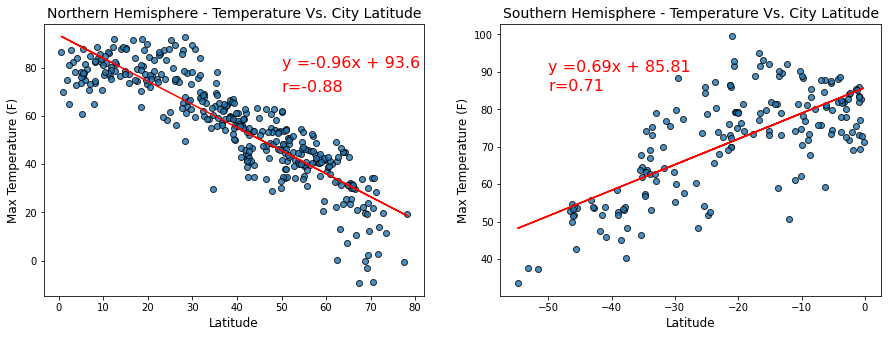

In [130]:
# create figure and axes
fig, axes = plt.subplots(1,2,figsize=(15,5))
ax1 = axes[0]
ax2 = axes[1]

x1=NH_Lat
y1=NH_MT
slope1=NH_MT_slope
int1=NH_MT_int
r1=NH_MT_r

x2=SH_Lat
y2=SH_MT
slope2=SH_MT_slope
int2=SH_MT_int
r2=SH_MT_r


Predicted1 = x1 * slope1 + int1
Predicted2 = x2 * slope2 + int2

# AXES 1 Scatter - Northern Hemisphere - Max Temp Vs Latitude
ax1.scatter(x1, y1, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
ax1.set_title(f"Northern Hemisphere - Temperature Vs. City Latitude", fontsize = "14")
ax1.set_xlabel(f"Latitude", fontsize="12")
ax1.set_ylabel(f"Max Temperature (F)", fontsize="12")

# AXES 1 Regression Line - Northern Hemisphere - Max Temp Vs Latitude

ax1.plot(x1,Predicted1, "r")
line_eq1 = "y =" + str(round(slope1,2)) + "x + " + str(round(int1,2))
ax1.annotate(line_eq1,(50,80),fontsize=16,color="red")
ax1.annotate(f"r={round(r1,2)}",(50,70),fontsize=16,color="red")

# AXES 2 Scatter - Southern Hemisphere - Max Temp Vs Latitude
ax2.scatter(x2, y2,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
ax2.set_title(f"Southern Hemisphere - Temperature Vs. City Latitude", fontsize = "14")
ax2.set_xlabel(f"Latitude", fontsize="12")
ax2.set_ylabel(f"Max Temperature (F)", fontsize="12")

# AXES 2 Regression Line - Northern Hemisphere - Max Temp Vs Latitude
ax2.plot(x2,Predicted2, "r")
line_eq2 = "y =" + str(round(slope2,2)) + "x + " + str(round(int2,2))
ax2.annotate(line_eq2,(-50,90),fontsize=16,color="red")
ax2.annotate(f"r={round(r2,2)}",(-50,85),fontsize=16,color="red")

print(f"From a total of {len(Northern_Hemisphere_df)} randomly selected cities in the Northern Hemisphere")
print(f"And a total of {len(Southern_Hemisphere_df)} randomly selected cities in the Southern Hemisphere")

plt.show()
pp.savefig(fig)

## Latitude vs. Humidity Plot

From a total of 372 randomly selected cities in the Northern Hemisphere
And a total of 178 randomly selected cities in the Southern Hemisphere


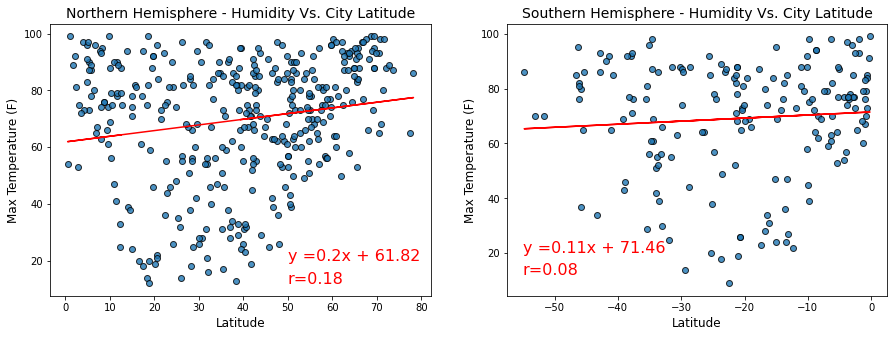

In [131]:
# create figure and axes
fig, axes = plt.subplots(1,2,figsize=(15,5))
ax1 = axes[0]
ax2 = axes[1]

x1=NH_Lat
y1=NH_HU
slope1=NH_HU_slope
int1=NH_HU_int
r1=NH_HU_r

x2=SH_Lat
y2=SH_HU
slope2=SH_HU_slope
int2=SH_HU_int
r2=SH_HU_r


Predicted1 = x1 * slope1 + int1
Predicted2 = x2 * slope2 + int2

# AXES 1 Scatter - Northern Hemisphere - Max Temp Vs Latitude
ax1.scatter(x1, y1, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
ax1.set_title(f"Northern Hemisphere - Humidity Vs. City Latitude", fontsize = "14")
ax1.set_xlabel(f"Latitude", fontsize="12")
ax1.set_ylabel(f"Max Temperature (F)", fontsize="12")

# AXES 1 Regression Line - Northern Hemisphere - Max Temp Vs Latitude

ax1.plot(x1,Predicted1, "r")
line_eq1 = "y =" + str(round(slope1,2)) + "x + " + str(round(int1,2))
ax1.annotate(line_eq1,(50,20),fontsize=16,color="red")
ax1.annotate(f"r={round(r1,2)}",(50,12),fontsize=16,color="red")

# AXES 2 Scatter - Southern Hemisphere - Max Temp Vs Latitude
ax2.scatter(x2, y2,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
ax2.set_title(f"Southern Hemisphere - Humidity Vs. City Latitude", fontsize = "14")
ax2.set_xlabel(f"Latitude", fontsize="12")
ax2.set_ylabel(f"Max Temperature (F)", fontsize="12")

# AXES 2 Regression Line - Northern Hemisphere - Max Temp Vs Latitude
ax2.plot(x2,Predicted2, "r")
line_eq2 = "y =" + str(round(slope2,2)) + "x + " + str(round(int2,2))
ax2.annotate(line_eq2,(-55,20),fontsize=16,color="red")
ax2.annotate(f"r={round(r2,2)}",(-55,12),fontsize=16,color="red")

print(f"From a total of {len(Northern_Hemisphere_df)} randomly selected cities in the Northern Hemisphere")
print(f"And a total of {len(Southern_Hemisphere_df)} randomly selected cities in the Southern Hemisphere")

plt.show()
pp.savefig(fig)

## Latitude vs. Cloudiness Plot

From a total of 372 randomly selected cities in the Northern Hemisphere
And a total of 178 randomly selected cities in the Southern Hemisphere


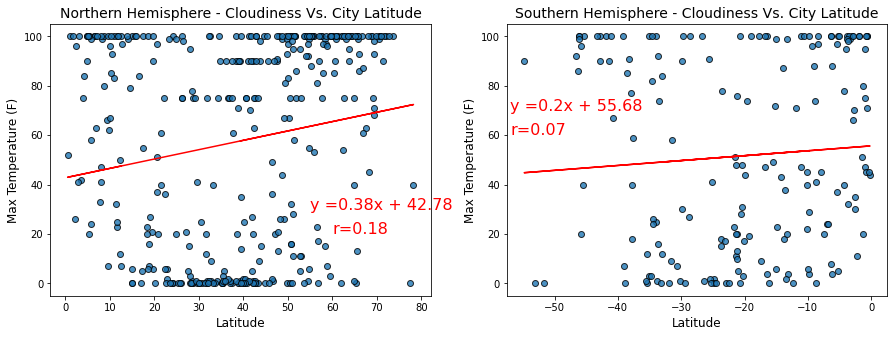

In [132]:
# create figure and axes
fig, axes = plt.subplots(1,2,figsize=(15,5))
ax1 = axes[0]
ax2 = axes[1]

x1=NH_Lat
y1=NH_CL
slope1=NH_CL_slope
int1=NH_CL_int
r1=NH_CL_r

x2=SH_Lat
y2=SH_CL
slope2=SH_CL_slope
int2=SH_CL_int
r2=SH_CL_r


Predicted1 = x1 * slope1 + int1
Predicted2 = x2 * slope2 + int2

# AXES 1 Scatter - Northern Hemisphere - Max Temp Vs Latitude
ax1.scatter(x1, y1, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
ax1.set_title(f"Northern Hemisphere - Cloudiness Vs. City Latitude", fontsize = "14")
ax1.set_xlabel(f"Latitude", fontsize="12")
ax1.set_ylabel(f"Max Temperature (F)", fontsize="12")

# AXES 1 Regression Line - Northern Hemisphere - Max Temp Vs Latitude

ax1.plot(x1,Predicted1, "r")
line_eq1 = "y =" + str(round(slope1,2)) + "x + " + str(round(int1,2))
ax1.annotate(line_eq1,(55,30),fontsize=16,color="red")
ax1.annotate(f"r={round(r1,2)}",(60,20),fontsize=16,color="red")

# AXES 2 Scatter - Southern Hemisphere - Max Temp Vs Latitude
ax2.scatter(x2, y2,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
ax2.set_title(f"Southern Hemisphere - Cloudiness Vs. City Latitude", fontsize = "14")
ax2.set_xlabel(f"Latitude", fontsize="12")
ax2.set_ylabel(f"Max Temperature (F)", fontsize="12")

# AXES 2 Regression Line - Northern Hemisphere - Max Temp Vs Latitude
ax2.plot(x2,Predicted2, "r")
line_eq2 = "y =" + str(round(slope2,2)) + "x + " + str(round(int2,2))
ax2.annotate(line_eq2,(-57,70),fontsize=16,color="red")
ax2.annotate(f"r={round(r2,2)}",(-57,60),fontsize=16,color="red")

print(f"From a total of {len(Northern_Hemisphere_df)} randomly selected cities in the Northern Hemisphere")
print(f"And a total of {len(Southern_Hemisphere_df)} randomly selected cities in the Southern Hemisphere")

plt.show()
pp.savefig(fig)

## Latitude vs. Wind Speed Plot

From a total of 372 randomly selected cities in the Northern Hemisphere
And a total of 178 randomly selected cities in the Southern Hemisphere


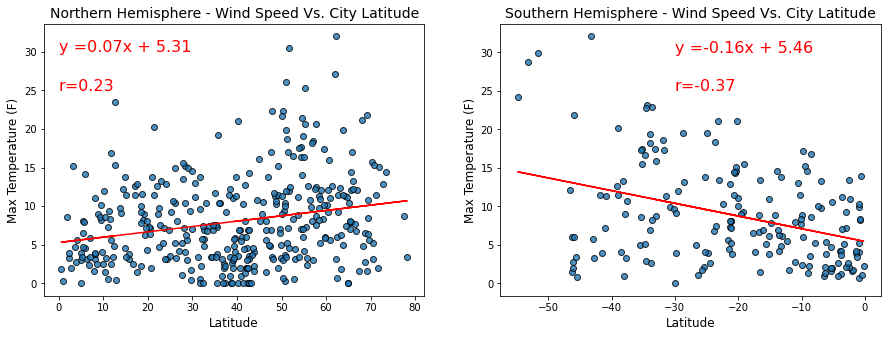

In [133]:
# create figure and axes
fig, axes = plt.subplots(1,2,figsize=(15,5))
ax1 = axes[0]
ax2 = axes[1]

x1=NH_Lat
y1=NH_WS
slope1=NH_WS_slope
int1=NH_WS_int
r1=NH_WS_r

x2=SH_Lat
y2=SH_WS
slope2=SH_WS_slope
int2=SH_WS_int
r2=SH_WS_r


Predicted1 = x1 * slope1 + int1
Predicted2 = x2 * slope2 + int2

# AXES 1 Scatter - Northern Hemisphere - Max Temp Vs Latitude
ax1.scatter(x1, y1, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
ax1.set_title(f"Northern Hemisphere - Wind Speed Vs. City Latitude", fontsize = "14")
ax1.set_xlabel(f"Latitude", fontsize="12")
ax1.set_ylabel(f"Max Temperature (F)", fontsize="12")

# AXES 1 Regression Line - Northern Hemisphere - Max Temp Vs Latitude

ax1.plot(x1,Predicted1, "r")
line_eq1 = "y =" + str(round(slope1,2)) + "x + " + str(round(int1,2))
ax1.annotate(line_eq1,(0,30),fontsize=16,color="red")
ax1.annotate(f"r={round(r1,2)}",(0,25),fontsize=16,color="red")

# AXES 2 Scatter - Southern Hemisphere - Max Temp Vs Latitude
ax2.scatter(x2, y2,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
ax2.set_title(f"Southern Hemisphere - Wind Speed Vs. City Latitude", fontsize = "14")
ax2.set_xlabel(f"Latitude", fontsize="12")
ax2.set_ylabel(f"Max Temperature (F)", fontsize="12")

# AXES 2 Regression Line - Northern Hemisphere - Max Temp Vs Latitude
ax2.plot(x2,Predicted2, "r")
line_eq2 = "y =" + str(round(slope2,2)) + "x + " + str(round(int2,2))
ax2.annotate(line_eq2,(-30,30),fontsize=16,color="red")
ax2.annotate(f"r={round(r2,2)}",(-30,25),fontsize=16,color="red")

print(f"From a total of {len(Northern_Hemisphere_df)} randomly selected cities in the Northern Hemisphere")
print(f"And a total of {len(Southern_Hemisphere_df)} randomly selected cities in the Southern Hemisphere")

plt.show()
pp.savefig(fig)

In [134]:
pp.close()